# Options - A Gentle Introduction

---

This note introduces the basic concepts of options: what call and put options are, how their payoffs work at expiry, and some key terminology that is used when discussing and trading them.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

## Why options?

Before diving into formulas, it helps to understand why options exist at all. Investors and firms use options for three main reasons:

1. Hedging: Options can act like insurance. For example, an investor who owns a stock but fears a large drop in price can buy a put option. If the stock falls sharply, the gain on the put helps offset the loss on the stock.

2. Taking views with limited downside: Options allow you to express a view on future price movements while limiting how much you can lose. Buying a call, for instance, lets you benefit if the price rises, but your maximum loss is the premium you paid.

3. Trading volatility: Option prices reflect the market’s expectation of how volatile the underlying will be. By buying or selling options (or option combinations), traders can take views on volatility itself, not just on the direction of the price. For example, buying options can be a way to benefit if the underlying turns out to move around more than the market currently expects.

In all these cases, the key attraction is the asymmetric payoff: you can walk away from bad outcomes (by not exercising) but keep the benefit from good ones.


## Description

An option is a financial contract written on an underlying asset and defined by two key terms: the strike price $K$ and the expiry date $T$. The strike price is the pre-agreed price at which the asset may be traded, and the expiry is the date when this right ends. 

There are two main types of options:

- Call option: gives the right (but not the obligation) to buy the asset at strike $K$.
- Put option: gives the right (but not the obligation) to sell the asset at strike $K$.

In finance, long means you have bought the contract and you own it.  Short means you have sold the contract to someone else and taken the opposite side of their position. This contract can lead to different payoffs at expiry, depending on where the market price at expiry $S_T$ ends up as compared to the strike $K$. This is also known as the **intrinsic value** of your option contract:

- Long Call: $\max(S_T - K, 0)$
- Long Put: $\max(K - S_T, 0)$
- Short Call: $-\max(S_T - K, 0)$
- Short Put: $-\max(K - S_T, 0)$

For example, in a long call position:

- If $S_T > K$, exercising lets you buy at $K$, which is cheaper than the market, so the payoff from the contract is $S_T - K$.
- If $S_T < K$, exercising would be a bad deal, so you let the option expire and the payoff from the contract is $0$.

From the $\max$ formulation we can immediately deduce the downside on the contract payoff is limited (it cannot be less than $0$ for a long option), while the upside can grow if the price moves far in your favor. This asymmetric return - otherwise known as the "hockey stick" shape payoff - is often described as *convexity* in standard texts such as Hull’s *Options, Futures, and Other Derivatives* or Bennett’s *Trading Volatility, Correlation, Term Structure and Skew*.

## Payoff Diagram

In the following charts, we will use these four basic payoff diagrams to build intuition for more complex option strategies. Each new strategy can be viewed as adding together the profit/loss lines of simple positions (long call, short call, long put, short put) to create a combined payoff shape.

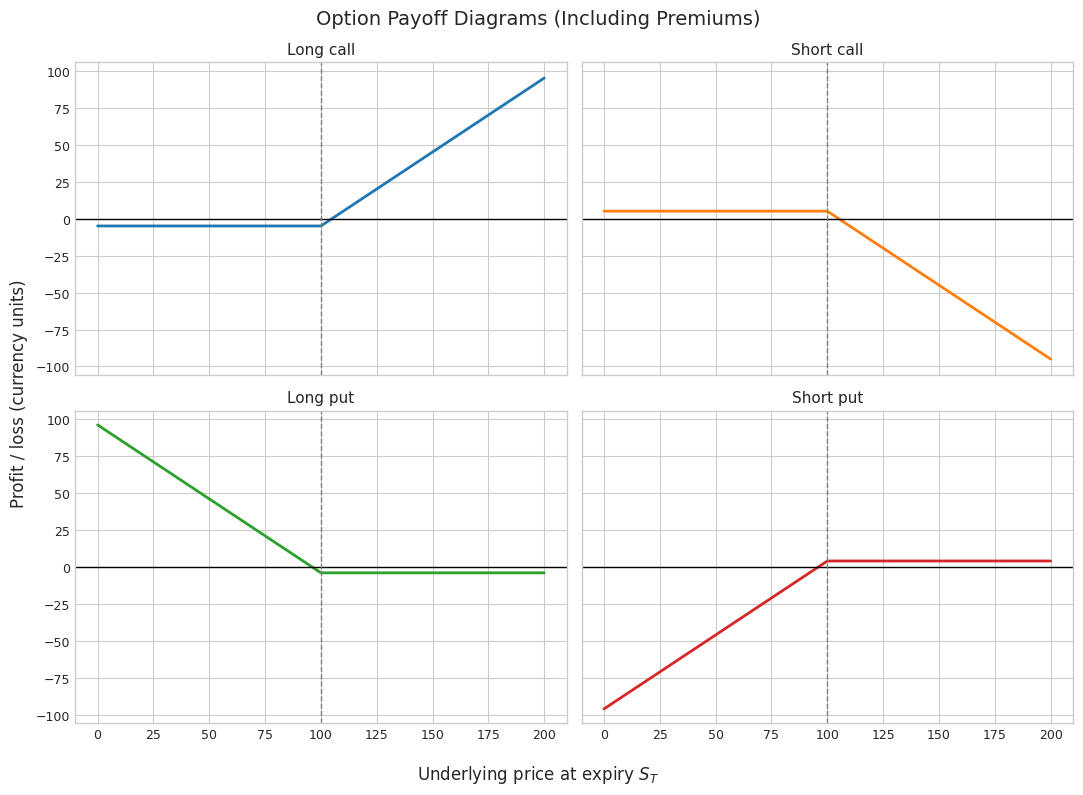

In [5]:
def style_ax(ax, title):
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(K, color="gray", linestyle="--", linewidth=1)
    ax.set_title(title, fontsize=11)
    ax.tick_params(labelsize=9)


# Parameters
K = 100.0  # strike
prem_call = 5.0  # call premium
prem_put = 4.0  # put premium

# Underlying price at expiry
S_T = np.linspace(0, 200, 400)

# Long call / short call (P&L including premium)
long_call = np.maximum(S_T - K, 0) - prem_call
short_call = -np.maximum(S_T - K, 0) + prem_call

# Long put / short put (P&L including premium)
long_put = np.maximum(K - S_T, 0) - prem_put
short_put = -np.maximum(K - S_T, 0) + prem_put

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=True, sharey=True)

# Long call
axes[0, 0].plot(S_T, long_call, color="tab:blue", linewidth=2)
style_ax(axes[0, 0], "Long call")

# Short call
axes[0, 1].plot(S_T, short_call, color="tab:orange", linewidth=2)
style_ax(axes[0, 1], "Short call")

# Long put
axes[1, 0].plot(S_T, long_put, color="tab:green", linewidth=2)
style_ax(axes[1, 0], "Long put")

# Short put
axes[1, 1].plot(S_T, short_put, color="tab:red", linewidth=2)
style_ax(axes[1, 1], "Short put")

# Common x/y labels
fig.supxlabel("Underlying price at expiry $S_T$", fontsize=12)
fig.supylabel("Profit / loss (currency units)", fontsize=12)

# Overall title
fig.suptitle("Option Payoff Diagrams (Including Premiums)", fontsize=14, y=0.98)

plt.tight_layout()
plt.show()

By stacking and combining these payoffs, we can design positions that:

- Limit risk to a chosen range of underlying prices $S_T$,
- Generate income in exchange for taking on certain risks,
- Or hedge existing exposures against large moves in $S_T$.

We leave this the Simple Option Strategies notebook.

## Pricing and Greeks

The payoff diagram shows what you could receive (or lose) for different values of the underlying at expiry. What it does not tell you is how much you should pay today for the right to that future payoff, given that prices, interest rates and volatility will all evolve between now and expiry. In particular, if the owner of the option enjoys the asymmetric payoff (limited downside, potentially large upside), no rational seller will agree to this contract for free. The seller will only enter the trade if they receive a premium that fairly compensates them for the risk they are taking.

This leads to the central pricing question: **given today’s underlying price, the strike $K$, the time to expiry, interest rates, and the volatility of the underlying, what is a fair premium today for that future payoff?**

Pricing models, such as the Black–Scholes framework, are built precisely to answer this question. They take the payoff profile you have drawn, combine it with assumptions about how the underlying price evolves, and produce a theoretical option price: the premium that should change hands today in a market with no arbitrage. This theory is very well developed and underlies the work of Black, Scholes, and Merton, which was recognized with the 1997 Nobel Prize in Economic Sciences. For a detailed treatment, we refer the reader to the Black–Scholes notebook.

To give a first sense of how model prices react to changes in the world, it is useful to introduce the option “Greeks”. In broad terms, the Greeks measure how sensitive an option’s price is to small changes in key inputs:

- Delta: sensitivity to the underlying price $S$.
- Gamma: sensitivity of delta itself to $S$ (the curvature with respect to $S$).
- Theta: sensitivity to the passage of time (time decay).
- Vega: sensitivity to volatility.
- Rho: sensitivity to interest rates.

Conceptually, each Greek is defined as a partial derivative of the option pricing function with respect to one variable. This definition does not depend on any particular model: whatever function you use to map inputs (price, volatility, time, rates) to an option price, you can in principle take these derivatives.

In practice, however, the option price as a function of the inputs almost always comes from a model, such as Black–Scholes or a more advanced volatility model. The numerical values of delta, gamma, theta, vega, and rho are then computed within that model, and so they inherit its assumptions. For this reason, traders sometimes speak of a “Black–Scholes delta” or “model vega”: the ideas are model‑invariant, but the actual numbers are model‑dependent.

A separate “Greeks” notebook develops these ideas in more detail, including code to compute and plot the price and Greeks of a simple European call as functions of the underlying price.
